C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


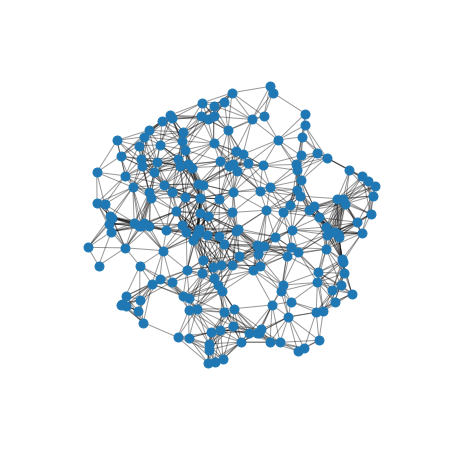

In [4]:
import networkx as nx
from matplotlib import pyplot as plt # import matplotlib.pyplot as plt
G = nx.random_geometric_graph(500, 0.1)

#print('printing cycles-phases of geometric graph')
#print(nx.cycle_basis(G,0))


# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
#ncenter = min(pos.items(), key = lambda (node, (x, y)): (x-0.5)**2+(y-0.5)**2)


dmin =1
ncenter =0
for n in pos:
    x,y = pos[n]
    d = (x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter = n
        dmin = d
#
# color by path length from node near center
p = {node:length
     for node, length in nx.single_source_shortest_path_length(G, ncenter).items()
     if length < 5}

plt.figure(figsize = (8, 8))

#node_color = p.values()
betw = nx.betweenness_centrality(G)

#color nodes according to values of betweenness 
H = G.subgraph(p.keys())    
nx.draw_networkx_edges(H, pos, alpha = 0.4)
nx.draw_networkx_nodes(H, pos, node_size = 80, #node_color = node_color,
                       cmap = plt.get_cmap('Reds_r'))



plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
#plt.savefig('random_geometric_graph.png')
plt.show()


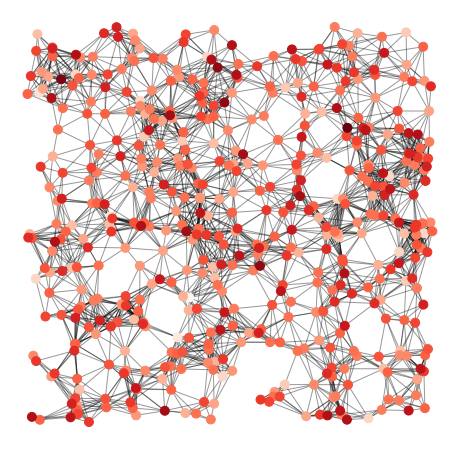

In [9]:
'''
Now we want to color geometric graph nodes 
according to its betweenness or other network measures
'''

degree = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
 
node_color = degree_sequence

plt.figure(figsize = (8, 8))


#color nodes according to values of betweenness 
 
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_nodes(G, pos, node_size = 80, node_color = node_color,
                       cmap = plt.get_cmap('Reds_r'))



plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()